In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from mlxtend.preprocessing import minmax_scaling

2022-12-16 04:36:15.263011: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-16 04:36:15.643729: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-16 04:36:15.643769: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-16 04:36:17.943204: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

### Importing our first dataset, Reliance

In [2]:
df = pd.read_csv('./archive/RELIANCE.csv', index_col=0)

In [3]:
df.index = pd.to_datetime(df.index)
df = df.drop(['Symbol', 'Series', 'Prev Close', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis = 1)

#### Exploring the Dataset

In [4]:
df.head()

,Open,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,
2000-01-03,237.50,251.70,237.50,251.70,251.70,249.37,4456424
2000-01-04,258.40,271.85,251.30,271.85,271.85,263.52,9487878
2000-01-05,256.65,287.90,256.65,286.75,282.50,274.79,26833684
2000-01-06,289.00,300.70,289.00,293.50,294.35,295.45,15682286
2000-01-07,295.00,317.90,293.00,314.50,314.55,308.91,19870977


In [5]:
df.describe()

,Open,High,Low,Last,Close,VWAP,Volume
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03
mean,1012.602375,1026.823803,996.886977,1011.157143,1011.316839,1011.937409,5.583028e+06
std,572.575893,581.986757,560.703328,570.938608,571.046753,571.222520,4.983793e+06
min,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04
25%,572.925000,582.950000,564.237500,572.062500,572.512500,573.190000,2.836454e+06
50%,939.000000,950.075000,927.550000,939.025000,938.275000,939.785000,4.213432e+06
75%,1247.675000,1267.350000,1227.450000,1248.287500,1248.275000,1247.375000,6.602604e+06
max,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07


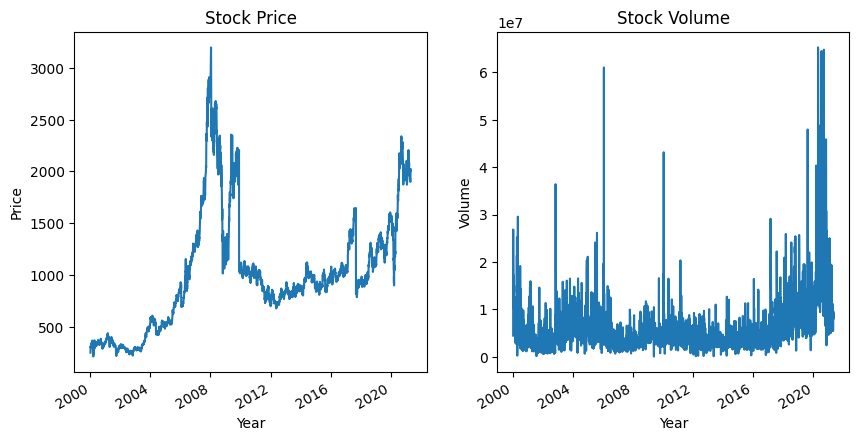

In [6]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
df.VWAP.plot()
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Stock Price')

plt.subplot(1,2,2)
df.Volume.plot()
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title('Stock Volume')
plt.show()

In [7]:
data = np.array(df.loc[:, 'VWAP'].copy())

In [8]:
# Normalizing our data
data = minmax_scaling(data, columns = 0)

In [9]:
# Splitting our data into training, validation and testing sets
train_data, val_data, test_data = data[:int(0.65*len(data))], data[int(0.65*len(data)):int(0.82*len(data))], data[int(0.82*len(data)):]

#### Creating Training, Validation and Test Set

In [10]:
def create_seq(data, backlog = 20):
    n = len(data) - backlog
    seq = []
    labels = []
    for i in range(n):
        seq.append(data[i:i + backlog])
        labels.append(data[i + backlog])
    seq = np.array(seq)
    labels = np.array(labels)
    return seq.reshape(seq.shape[0], seq.shape[1], 1), np.array(labels).reshape(labels.shape[0], 1)

In [11]:
train_X, train_y = create_seq(train_data)
val_X, val_y = create_seq(val_data)
test_X, test_y = create_seq(test_data)

In [12]:
train_X.shape

(3428, 20, 1)

#### Training our first model using Simple Recurrent Neural Network

In [13]:
model1 = keras.models.Sequential()
model1.add(keras.layers.SimpleRNN(80, return_sequences=True, input_shape = [None, 1]))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.SimpleRNN(40))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.Dense(1))

2022-12-16 04:36:22.425835: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-16 04:36:22.425913: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-16 04:36:22.425958: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-12-16 04:36:22.426376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 80)          6560      
                                                                 
 dropout (Dropout)           (None, None, 80)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40)                4840      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 11,441
Trainable params: 11,441
Non-trainable params: 0
_________________________________________________________________


In [15]:
model1.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.MSE)

In [16]:
model1.fit(train_X, train_y, epochs=30, validation_data=(val_X, val_y), callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
108/108 [==============================] - 9s 25ms/step - loss: 0.0306 - val_loss: 9.9849e-05
Epoch 2/30
108/108 [==============================] - 2s 17ms/step - loss: 0.0072 - val_loss: 1.5213e-04
Epoch 3/30
108/108 [==============================] - 2s 17ms/step - loss: 0.0050 - val_loss: 2.7424e-04
Epoch 4/30
108/108 [==============================] - 2s 17ms/step - loss: 0.0035 - val_loss: 5.1670e-04
Epoch 5/30
108/108 [==============================] - 2s 17ms/step - loss: 0.0035 - val_loss: 1.4268e-04
Epoch 6/30
108/108 [==============================] - 2s 17ms/step - loss: 0.0028 - val_loss: 1.1119e-04
Epoch 7/30
108/108 [==============================] - 2s 17ms/step - loss: 0.0023 - val_loss: 1.3504e-04
Epoch 8/30
108/108 [==============================] - 2s 17ms/step - loss: 0.0022 - val_loss: 1.1494e-04
Epoch 9/30
108/108 [==============================] - 2s 17ms/step - loss: 0.0019 - val_loss: 4.0632e-05
Epoch 10/30
108/108 [==============================] - 

In [17]:
model1.evaluate(test_X, test_y)

30/30 [==============================] - 0s 6ms/step - loss: 2.5044e-04


0.00025044105132110417

#### Let's try to improve our model using LSTM

In [18]:
model2 = keras.models.Sequential()
model2.add(keras.layers.LSTM(80, return_sequences=True, input_shape = [None, 1]))
model2.add(keras.layers.Dropout(0.25))
model2.add(keras.layers.LSTM(40))
model2.add(keras.layers.Dropout(0.25))
model2.add(keras.layers.Dense(1))

In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 80)          26240     
                                                                 
 dropout_2 (Dropout)         (None, None, 80)          0         
                                                                 
 lstm_1 (LSTM)               (None, 40)                19360     
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 45,641
Trainable params: 45,641
Non-trainable params: 0
_________________________________________________________________


In [20]:
model2.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.MSE)

In [21]:
model2.fit(train_X, train_y, epochs=30, validation_data=(val_X, val_y), callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
108/108 [==============================] - 12s 49ms/step - loss: 0.0065 - val_loss: 1.4947e-04
Epoch 2/30
108/108 [==============================] - 4s 34ms/step - loss: 0.0021 - val_loss: 1.6841e-04
Epoch 3/30
108/108 [==============================] - 4s 35ms/step - loss: 0.0020 - val_loss: 1.4050e-04
Epoch 4/30
108/108 [==============================] - 4s 36ms/step - loss: 0.0019 - val_loss: 2.4893e-04
Epoch 5/30
108/108 [==============================] - 4s 34ms/step - loss: 0.0017 - val_loss: 2.9206e-04
Epoch 6/30
108/108 [==============================] - 4s 33ms/step - loss: 0.0015 - val_loss: 2.9129e-04
Epoch 7/30
108/108 [==============================] - 4s 34ms/step - loss: 0.0014 - val_loss: 1.6689e-04
Epoch 8/30
108/108 [==============================] - 4s 34ms/step - loss: 0.0014 - val_loss: 1.0157e-04
Epoch 9/30
108/108 [==============================] - 4s 34ms/step - loss: 0.0012 - val_loss: 1.2247e-04
Epoch 10/30
108/108 [==============================] -

In [22]:
model2.evaluate(test_X, test_y)

30/30 [==============================] - 1s 16ms/step - loss: 3.1421e-04


0.0003142108616884798

In [23]:
pred_y = model2.predict(test_X)

30/30 [==============================] - 2s 14ms/step


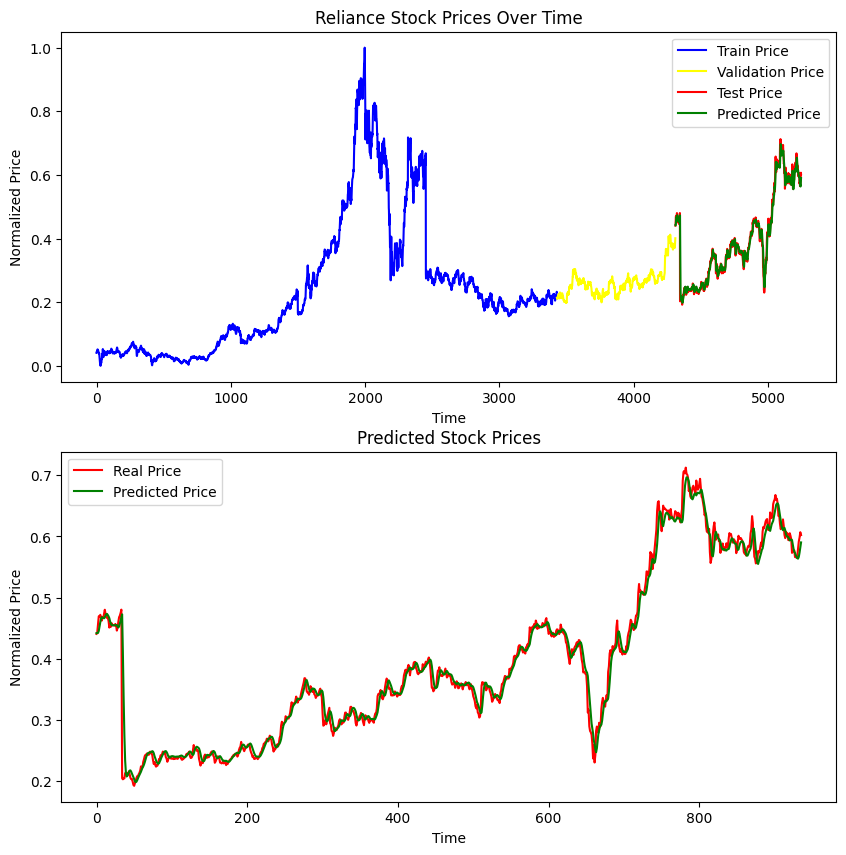

In [24]:
plt.figure(figsize=(10,10))

x = [range(0, len(train_y)), range(len(train_y), len(train_y) + len(val_y)), range(len(train_y) + len(val_y), len(train_y) + len(val_y) + len(pred_y))]

plt.subplot(2, 1, 1)
plt.plot(x[0], train_y, color = 'blue', label = 'Train Price')
plt.plot(x[1], val_y, color = 'yellow', label = 'Validation Price')
plt.plot(x[2], test_y, color = 'red', label = 'Test Price')
plt.plot(x[2], pred_y, color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title("Reliance Stock Prices Over Time")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(test_y, color = 'red', label = 'Real Price')
plt.plot(pred_y, color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title("Predicted Stock Prices")
plt.legend()
plt.show()

#### The predicted price is a lot similar to our real price
#### Now let's try to predict next 10 prices, using the previous 30 days

In [25]:
def create_seq2(data, backlog = 30, pred_len = 10):
    n = len(data) - backlog - pred_len + 1
    seq = []
    labels = []
    for i in range(n):
        seq.append(data[i:i + backlog])
        labels.append(data[i + backlog: i + backlog + pred_len])
    seq = np.array(seq)
    labels = np.array(labels)
    return seq.reshape(seq.shape[0], seq.shape[1], 1), np.array(labels).reshape(labels.shape[0], labels.shape[1], 1)

In [26]:
train_X, train_y = create_seq2(train_data)
val_X, val_y = create_seq2(val_data)
test_X, test_y = create_seq2(test_data)

In [27]:
train_X.shape, test_X.shape

((3409, 30, 1), (917, 30, 1))

In [28]:
model3 = keras.models.Sequential()
model3.add(keras.layers.LSTM(80, return_sequences=True, input_shape = [None, 1]))
model3.add(keras.layers.Dropout(0.25))
model3.add(keras.layers.LSTM(40))
model3.add(keras.layers.Dropout(0.25))
model3.add(keras.layers.Dense(10))

In [29]:
model3.compile(optimizer=keras.optimizers.Adam(), loss= keras.losses.MSE)

In [30]:
model3.fit(train_X, train_y, epochs=30, validation_data=(val_X, val_y), callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
107/107 [==============================] - 17s 70ms/step - loss: 0.0183 - val_loss: 0.0011
Epoch 2/30
107/107 [==============================] - 6s 52ms/step - loss: 0.0054 - val_loss: 3.2772e-04
Epoch 3/30
107/107 [==============================] - 6s 53ms/step - loss: 0.0038 - val_loss: 6.6541e-04
Epoch 4/30
107/107 [==============================] - 5s 51ms/step - loss: 0.0033 - val_loss: 5.6679e-04
Epoch 5/30
107/107 [==============================] - 6s 53ms/step - loss: 0.0028 - val_loss: 3.3902e-04
Epoch 6/30
107/107 [==============================] - 6s 54ms/step - loss: 0.0025 - val_loss: 3.1307e-04
Epoch 7/30
107/107 [==============================] - 6s 54ms/step - loss: 0.0023 - val_loss: 3.6835e-04
Epoch 8/30
107/107 [==============================] - 6s 52ms/step - loss: 0.0022 - val_loss: 2.2603e-04
Epoch 9/30
107/107 [==============================] - 5s 51ms/step - loss: 0.0020 - val_loss: 3.5797e-04
Epoch 10/30
107/107 [==============================] - 6s 

In [31]:
model3.evaluate(test_X, test_y)

29/29 [==============================] - 1s 18ms/step - loss: 0.0016


0.0015961708268150687

In [32]:
pred_y = model3.predict(test_X)

29/29 [==============================] - 2s 21ms/step


In [33]:
pred_y.shape

(917, 10)

In [34]:
np.array(range(1,5)).shape

(4,)

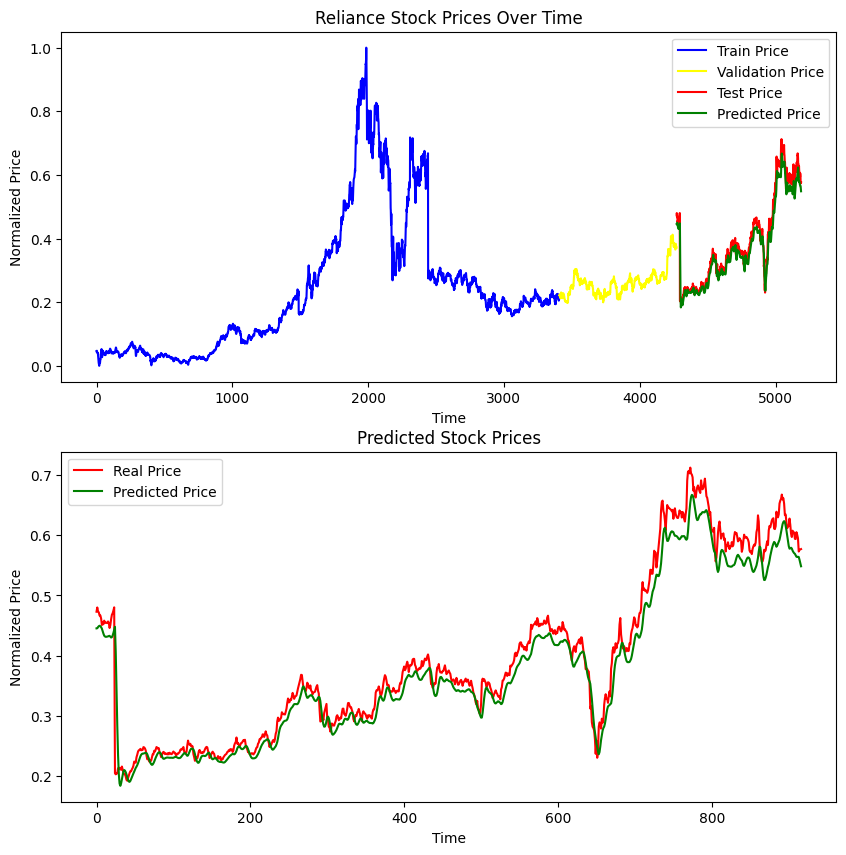

In [35]:
plt.figure(figsize=(10,10))

x = [range(0, len(train_y)), range(len(train_y), len(train_y) + len(val_y)), range(len(train_y) + len(val_y), len(train_y) + len(val_y) + len(pred_y))]

plt.subplot(2, 1, 1)
plt.plot(x[0], [_[0] for _ in train_y], color = 'blue', label = 'Train Price')
plt.plot(x[1], [_[0] for _ in val_y], color = 'yellow', label = 'Validation Price')
plt.plot(x[2], [_[0] for _ in test_y], color = 'red', label = 'Test Price')
plt.plot(x[2], [_[0] for _ in pred_y], color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title("Reliance Stock Prices Over Time")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot([_[0] for _ in test_y], color = 'red', label = 'Real Price')
plt.plot([_[0] for _ in pred_y], color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title("Predicted Stock Prices")
plt.legend()
plt.show()

### Let's predict future prices of some other stocks

- TCS

In [36]:
df = pd.read_csv('./archive/TCS.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df = df.drop(['Symbol', 'Series', 'Prev Close', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis = 1)
df.describe()

,Open,High,Low,Last,Close,VWAP,Volume
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03
mean,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06
std,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06
min,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04
25%,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05
50%,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06
75%,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06
max,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07


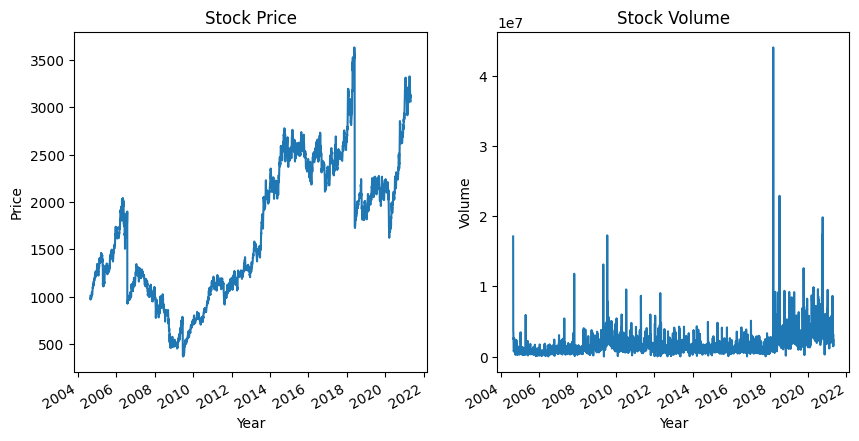

In [37]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
df.VWAP.plot()
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Stock Price')

plt.subplot(1,2,2)
df.Volume.plot()
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title('Stock Volume')
plt.show()

In [38]:
data = np.array(df.loc[:, 'VWAP'].copy())

# Normalizing our data
data = minmax_scaling(data, columns = 0)

# Splitting our data into training, validation and testing sets
train_data, val_data, test_data = data[:int(0.65*len(data))], data[int(0.65*len(data)):int(0.82*len(data))], data[int(0.82*len(data)):]

train_X, train_y = create_seq(train_data)
val_X, val_y = create_seq(val_data)
test_X, test_y = create_seq(test_data)

In [39]:
model4 = keras.models.Sequential()
model4.add(keras.layers.LSTM(80, return_sequences=True, input_shape = [None, 1]))
model4.add(keras.layers.Dropout(0.25))
model4.add(keras.layers.LSTM(40))
model4.add(keras.layers.Dropout(0.25))
model4.add(keras.layers.Dense(1))
model4.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.MSE)
model4.fit(train_X, train_y, epochs=30, validation_data=(val_X, val_y), callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
84/84 [==============================] - 15s 61ms/step - loss: 0.0073 - val_loss: 8.2396e-04
Epoch 2/30
84/84 [==============================] - 3s 39ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 3/30
84/84 [==============================] - 3s 39ms/step - loss: 0.0017 - val_loss: 6.7394e-04
Epoch 4/30
84/84 [==============================] - 3s 39ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/30
84/84 [==============================] - 3s 38ms/step - loss: 0.0015 - val_loss: 7.0275e-04
Epoch 6/30
84/84 [==============================] - 3s 39ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/30
84/84 [==============================] - 3s 41ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 8/30
84/84 [==============================] - 3s 41ms/step - loss: 0.0013 - val_loss: 5.6242e-04
Epoch 9/30
84/84 [==============================] - 3s 37ms/step - loss: 0.0012 - val_loss: 6.8988e-04
Epoch 10/30
84/84 [==============================] - 3s 37ms/step - loss: 0.0012 - val_l

23/23 [==============================] - 2s 13ms/step


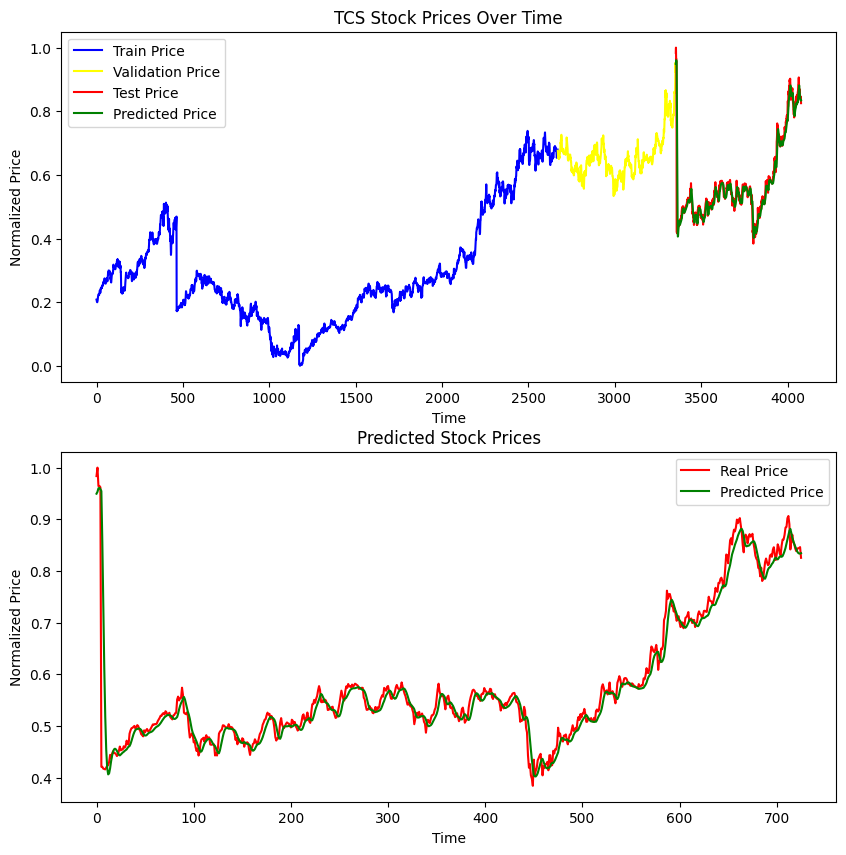

In [40]:
plt.figure(figsize=(10,10))

pred_y = model4.predict(test_X)
x = [range(0, len(train_y)), range(len(train_y), len(train_y) + len(val_y)), range(len(train_y) + len(val_y), len(train_y) + len(val_y) + len(pred_y))]

plt.subplot(2, 1, 1)
plt.plot(x[0], train_y, color = 'blue', label = 'Train Price')
plt.plot(x[1], val_y, color = 'yellow', label = 'Validation Price')
plt.plot(x[2], test_y, color = 'red', label = 'Test Price')
plt.plot(x[2], pred_y, color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title("TCS Stock Prices Over Time")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(test_y, color = 'red', label = 'Real Price')
plt.plot(pred_y, color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title("Predicted Stock Prices")
plt.legend()
plt.show()

- HDFC

In [41]:
df = pd.read_csv('./archive/HDFC.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df = df.drop(['Symbol', 'Series', 'Prev Close', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis = 1)
df.describe()

,Open,High,Low,Last,Close,VWAP,Volume
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03
mean,1284.393074,1304.269732,1263.297842,1283.885017,1284.071005,1283.664578,1.848187e+06
std,709.703665,721.308080,697.450309,709.250204,709.430515,709.109622,2.991387e+06
min,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03
25%,669.712500,677.512500,660.000000,669.000000,668.662500,668.265000,3.034970e+05
50%,1135.400000,1156.725000,1119.000000,1135.000000,1136.675000,1136.720000,1.337788e+06
75%,1813.812500,1835.000000,1783.075000,1812.000000,1811.787500,1811.680000,2.732310e+06
max,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08


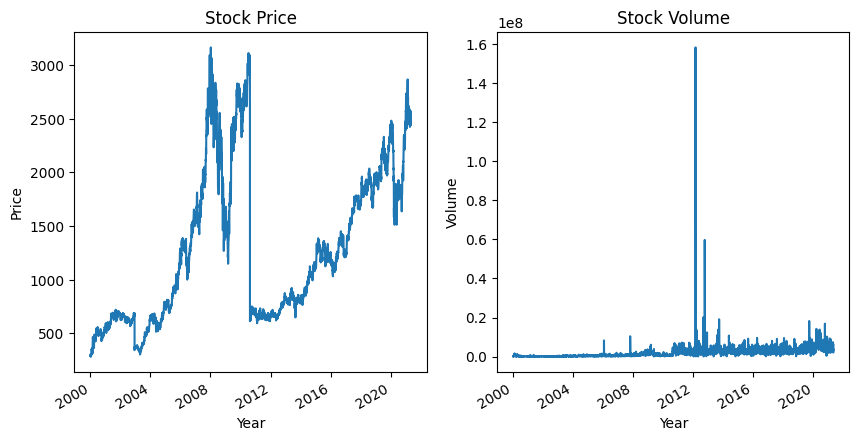

In [42]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
df.VWAP.plot()
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Stock Price')

plt.subplot(1,2,2)
df.Volume.plot()
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title('Stock Volume')
plt.show()

In [43]:
data = np.array(df.loc[:, 'VWAP'].copy())

# Normalizing our data
data = minmax_scaling(data, columns = 0)

# Splitting our data into training, validation and testing sets
train_data, val_data, test_data = data[:int(0.65*len(data))], data[int(0.65*len(data)):int(0.82*len(data))], data[int(0.82*len(data)):]

train_X, train_y = create_seq(train_data)
val_X, val_y = create_seq(val_data)
test_X, test_y = create_seq(test_data)

In [44]:
model5 = keras.models.Sequential()
model5.add(keras.layers.LSTM(80, return_sequences=True, input_shape = [None, 1]))
model5.add(keras.layers.Dropout(0.25))
model5.add(keras.layers.LSTM(40))
model5.add(keras.layers.Dropout(0.25))
model5.add(keras.layers.Dense(1))
model5.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.MSE)
model5.fit(train_X, train_y, epochs=30, validation_data=(val_X, val_y), callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
108/108 [==============================] - 14s 58ms/step - loss: 0.0099 - val_loss: 6.2332e-04
Epoch 2/30
108/108 [==============================] - 4s 36ms/step - loss: 0.0037 - val_loss: 6.7577e-04
Epoch 3/30
108/108 [==============================] - 4s 37ms/step - loss: 0.0032 - val_loss: 2.0203e-04
Epoch 4/30
108/108 [==============================] - 4s 37ms/step - loss: 0.0030 - val_loss: 1.6772e-04
Epoch 5/30
108/108 [==============================] - 4s 37ms/step - loss: 0.0030 - val_loss: 3.5646e-04
Epoch 6/30
108/108 [==============================] - 4s 36ms/step - loss: 0.0027 - val_loss: 2.4160e-04
Epoch 7/30
108/108 [==============================] - 4s 37ms/step - loss: 0.0026 - val_loss: 1.2608e-04
Epoch 8/30
108/108 [==============================] - 4s 38ms/step - loss: 0.0025 - val_loss: 5.5405e-04
Epoch 9/30
108/108 [==============================] - 4s 37ms/step - loss: 0.0024 - val_loss: 1.1975e-04
Epoch 10/30
108/108 [==============================] -

30/30 [==============================] - 3s 23ms/step


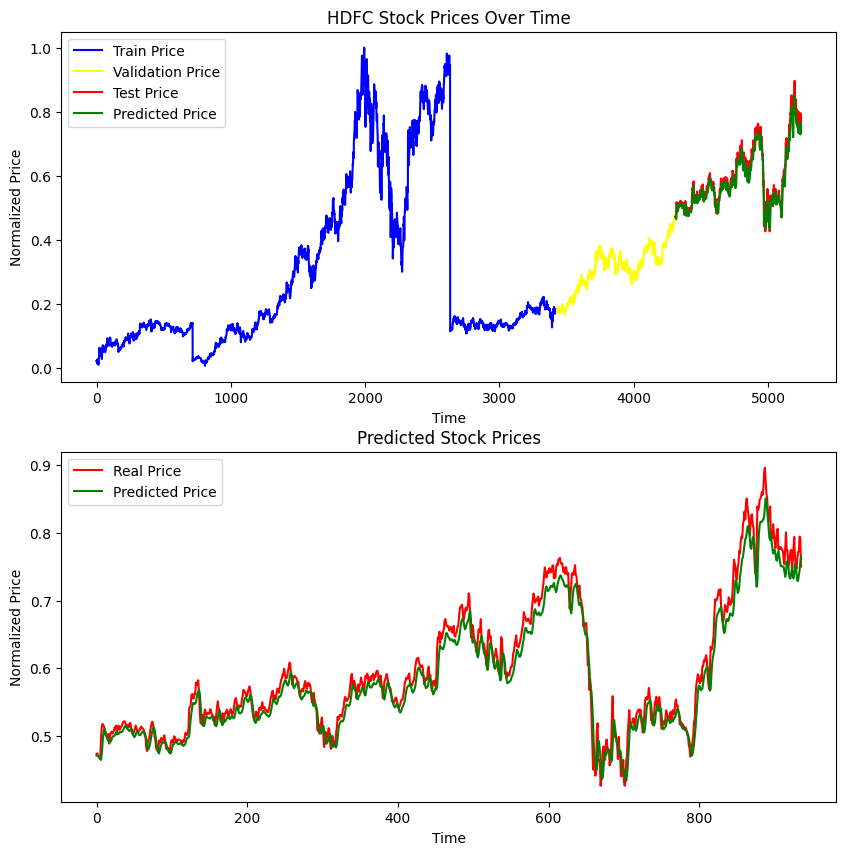

In [45]:
plt.figure(figsize=(10,10))

pred_y = model5.predict(test_X)
x = [range(0, len(train_y)), range(len(train_y), len(train_y) + len(val_y)), range(len(train_y) + len(val_y), len(train_y) + len(val_y) + len(pred_y))]

plt.subplot(2, 1, 1)
plt.plot(x[0], train_y, color = 'blue', label = 'Train Price')
plt.plot(x[1], val_y, color = 'yellow', label = 'Validation Price')
plt.plot(x[2], test_y, color = 'red', label = 'Test Price')
plt.plot(x[2], pred_y, color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title("HDFC Stock Prices Over Time")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(test_y, color = 'red', label = 'Real Price')
plt.plot(pred_y, color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title("Predicted Stock Prices")
plt.legend()
plt.show()

- BAJAJ AUTO

In [46]:
df = pd.read_csv('./archive/BAJAJ-AUTO.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df = df.drop(['Symbol', 'Series', 'Prev Close', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis = 1)
df.describe()

,Open,High,Low,Last,Close,VWAP,Volume
count,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3.202000e+03
mean,2191.537883,2219.934510,2162.215209,2190.307917,2190.412196,2191.294288,4.114639e+05
std,776.148452,781.289529,770.192017,775.065896,775.095766,775.657353,3.911067e+05
min,262.000000,307.050000,262.000000,300.000000,301.900000,301.980000,4.966000e+03
25%,1663.250000,1693.775000,1636.362500,1660.512500,1661.925000,1664.845000,2.054658e+05
50%,2270.000000,2305.575000,2240.250000,2270.750000,2270.225000,2269.900000,3.125365e+05
75%,2810.000000,2834.950000,2778.362500,2808.975000,2808.487500,2808.565000,5.000315e+05
max,4260.000000,4361.400000,4200.000000,4236.000000,4237.450000,4260.500000,8.537143e+06


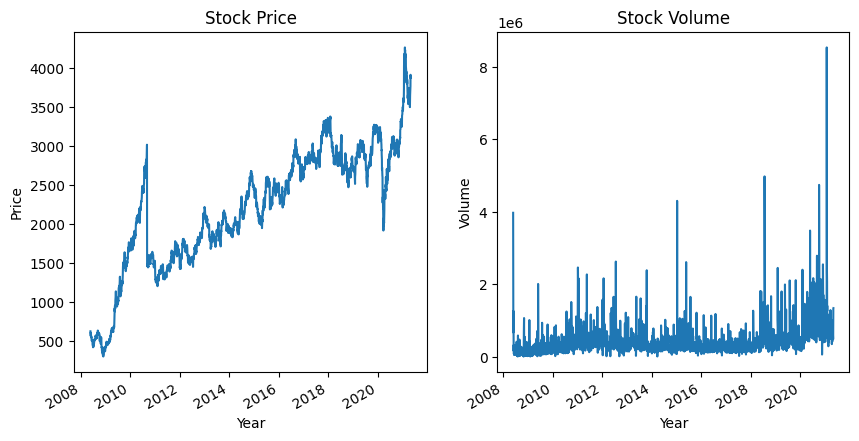

In [47]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
df.VWAP.plot()
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Stock Price')

plt.subplot(1,2,2)
df.Volume.plot()
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title('Stock Volume')
plt.show()

In [48]:
data = np.array(df.loc[:, 'VWAP'].copy())

# Normalizing our data
data = minmax_scaling(data, columns = 0)

# Splitting our data into training, validation and testing sets
train_data, val_data, test_data = data[:int(0.65*len(data))], data[int(0.65*len(data)):int(0.82*len(data))], data[int(0.82*len(data)):]

train_X, train_y = create_seq(train_data)
val_X, val_y = create_seq(val_data)
test_X, test_y = create_seq(test_data)

In [49]:
model6 = keras.models.Sequential()
model6.add(keras.layers.LSTM(80, return_sequences=True, input_shape = [None, 1]))
model6.add(keras.layers.Dropout(0.25))
model6.add(keras.layers.LSTM(40))
model6.add(keras.layers.Dropout(0.25))
model6.add(keras.layers.Dense(1))
model6.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.MSE)
model6.fit(train_X, train_y, epochs=30, validation_data=(val_X, val_y), callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
65/65 [==============================] - 15s 71ms/step - loss: 0.0135 - val_loss: 7.7216e-04
Epoch 2/30
65/65 [==============================] - 2s 37ms/step - loss: 0.0028 - val_loss: 4.7594e-04
Epoch 3/30
65/65 [==============================] - 2s 37ms/step - loss: 0.0026 - val_loss: 5.1369e-04
Epoch 4/30
65/65 [==============================] - 2s 38ms/step - loss: 0.0025 - val_loss: 6.6101e-04
Epoch 5/30
65/65 [==============================] - 3s 46ms/step - loss: 0.0022 - val_loss: 4.4820e-04
Epoch 6/30
65/65 [==============================] - 3s 50ms/step - loss: 0.0022 - val_loss: 4.2122e-04
Epoch 7/30
65/65 [==============================] - 3s 46ms/step - loss: 0.0022 - val_loss: 6.0584e-04
Epoch 8/30
65/65 [==============================] - 3s 41ms/step - loss: 0.0019 - val_loss: 4.4817e-04
Epoch 9/30
65/65 [==============================] - 2s 38ms/step - loss: 0.0018 - val_loss: 4.4139e-04
Epoch 10/30
65/65 [==============================] - 2s 38ms/step - loss

18/18 [==============================] - 3s 19ms/step


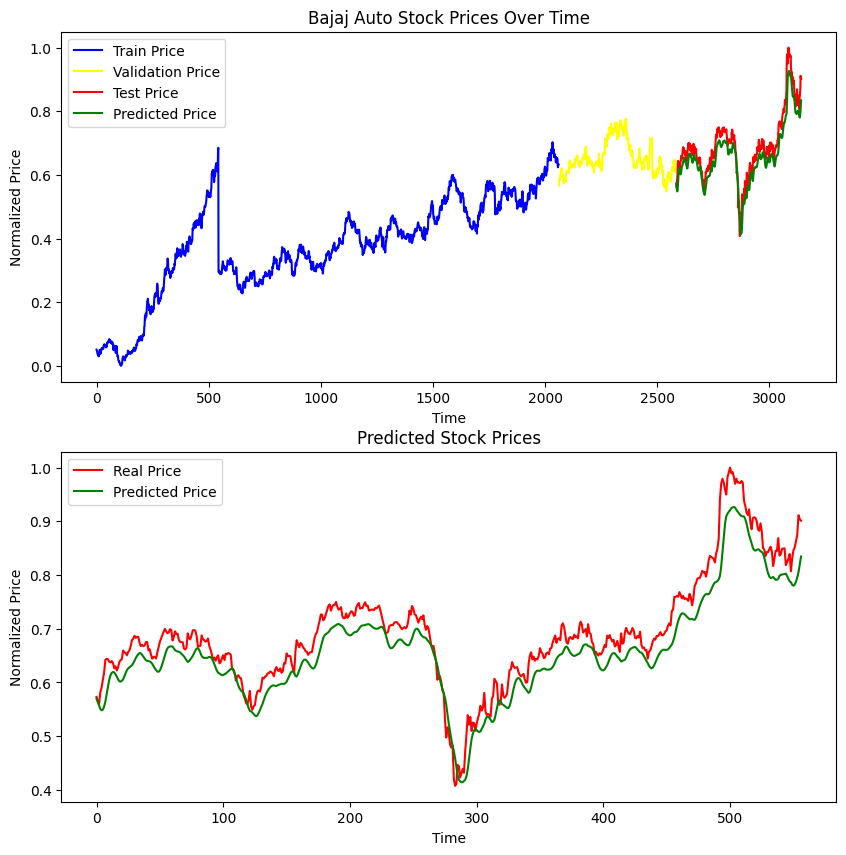

In [50]:
plt.figure(figsize=(10,10))

pred_y = model6.predict(test_X)
x = [range(0, len(train_y)), range(len(train_y), len(train_y) + len(val_y)), range(len(train_y) + len(val_y), len(train_y) + len(val_y) + len(pred_y))]

plt.subplot(2, 1, 1)
plt.plot(x[0], train_y, color = 'blue', label = 'Train Price')
plt.plot(x[1], val_y, color = 'yellow', label = 'Validation Price')
plt.plot(x[2], test_y, color = 'red', label = 'Test Price')
plt.plot(x[2], pred_y, color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title("Bajaj Auto Stock Prices Over Time")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(test_y, color = 'red', label = 'Real Price')
plt.plot(pred_y, color = 'green', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title("Predicted Stock Prices")
plt.legend()
plt.show()